# Feedback POC
-----
### Init

In [2]:
import time
import sys
import os
import PIL
import cv2
from PIL import ImageFont
import matplotlib.pylab as plt
import numpy as np
import json
import torch
import pandas as pd

sys.path.append("./Pose_Service/")

from mpl_toolkits.mplot3d import Axes3D
from pose3d_utils.coords import ensure_cartesian
from Pose_Service.VideoFrames import VideoFrames


from Pose_Service.margipose.data.skeleton import CanonicalSkeletonDesc
from Pose_Service.margipose.data_specs import ImageSpecs
from Pose_Service.margipose.models import load_model
from Pose_Service.margipose.utils import seed_all, init_algorithms, plot_skeleton_on_axes3d, plot_skeleton_on_axes, angleBetween


In [3]:
CPU = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
init_algorithms(deterministic=True)
torch.set_grad_enabled(False)
torch.no_grad()
seed_all(12345)

### Load Model

In [4]:
MODEL_PATH = "./Pose_Service/pretrained/margipose-mpi3d.pth"

In [5]:
start = time.time()
model = load_model(MODEL_PATH).to(CPU).eval()
end = time.time()
print(end-start, "(s) to load Model")

Details {'type': 'margipose', 'version': '6.0.0', 'settings': {'n_stages': 4, 'axis_permutation': True, 'feature_extractor': 'inceptionv4', 'pixelwise_loss': 'jsd'}}
50.3626766204834 (s) to load Model


### Input

In [6]:
INPUT_FILE_1 = "Pose_Service/Input/1.avi"
INPUT_FILE_2 = "Pose_Service/Input/2.avi"

In [7]:
filename = os.path.basename(INPUT_FILE_1)
filename_noext = os.path.splitext(filename)[0]
(frameArray_1, fps_1) = VideoFrames.ExtractFrames(INPUT_FILE_1)
frameArray_1 = np.asarray(frameArray_1, dtype=np.uint8)

480 x 640 Image size
83 Initial Frame Total
1.8013184070587158 (s) to complete video to frame
17 FPS
83 Actaul Total Frames


In [8]:
filename = os.path.basename(INPUT_FILE_2)
filename_noext = os.path.splitext(filename)[0]
(frameArray_2, fps_2) = VideoFrames.ExtractFrames(INPUT_FILE_2)
frameArray_2 = np.asarray(frameArray_2, dtype=np.uint8)

480 x 640 Image size
84 Initial Frame Total
1.177354097366333 (s) to complete video to frame
17 FPS
84 Actaul Total Frames


### Get 3D Pose

In [9]:
def process_image(image, input_specs):
    try:
        image: PIL.Image.Image = PIL.Image.open(image, 'r')
    except:
        pass
    if image.width != image.height:
        cropSize = min(image.width, image.height)
        image = image.crop((image.width/2 - cropSize/2, image.height/2 - cropSize/2,
                    image.width/2 + cropSize/2, image.height/2 + cropSize/2))
    if image.width < 256:
        image = image.resize((256, 256), PIL.Image.ANTIALIAS)
    image.thumbnail((input_specs.width, input_specs.height))
    return image

def get_coordinates(img):
    input_specs: ImageSpecs = model.data_specs.input_specs
    image = process_image(img, input_specs)
    input_image = input_specs.convert(image).to(CPU, torch.float32)
    output = model(input_image[None, ...])[0]
    norm_skel3d = ensure_cartesian(output.to(CPU, torch.float64), d=3)
    coords = norm_skel3d.cpu().numpy()
    return coords
    
def getPose(frameArray):
    skel3DArray = np.zeros((frameArray.shape[3], 17, 3), dtype=np.float)
    for i in range(frameArray.shape[3]):
        print("Frame", i, "/", frameArray.shape[3])
        img = PIL.Image.fromarray(frameArray[:,:,:,i][..., ::-1])
        coords = get_coordinates(img)
        skel3DArray[i, :, :] = coords
    return skel3DArray

In [10]:
skel3DArray_1 = getPose(frameArray_1)  

Frame 0 / 83
Frame 1 / 83
Frame 2 / 83
Frame 3 / 83
Frame 4 / 83
Frame 5 / 83
Frame 6 / 83
Frame 7 / 83
Frame 8 / 83
Frame 9 / 83
Frame 10 / 83
Frame 11 / 83
Frame 12 / 83
Frame 13 / 83
Frame 14 / 83
Frame 15 / 83
Frame 16 / 83
Frame 17 / 83
Frame 18 / 83
Frame 19 / 83
Frame 20 / 83
Frame 21 / 83
Frame 22 / 83
Frame 23 / 83
Frame 24 / 83
Frame 25 / 83
Frame 26 / 83
Frame 27 / 83
Frame 28 / 83
Frame 29 / 83
Frame 30 / 83
Frame 31 / 83
Frame 32 / 83
Frame 33 / 83
Frame 34 / 83
Frame 35 / 83
Frame 36 / 83
Frame 37 / 83
Frame 38 / 83
Frame 39 / 83
Frame 40 / 83
Frame 41 / 83
Frame 42 / 83
Frame 43 / 83
Frame 44 / 83
Frame 45 / 83
Frame 46 / 83
Frame 47 / 83
Frame 48 / 83
Frame 49 / 83
Frame 50 / 83
Frame 51 / 83
Frame 52 / 83
Frame 53 / 83
Frame 54 / 83
Frame 55 / 83
Frame 56 / 83
Frame 57 / 83
Frame 58 / 83
Frame 59 / 83
Frame 60 / 83
Frame 61 / 83
Frame 62 / 83
Frame 63 / 83
Frame 64 / 83
Frame 65 / 83
Frame 66 / 83
Frame 67 / 83
Frame 68 / 83
Frame 69 / 83
Frame 70 / 83
Frame 71 / 83
Fr

In [11]:
skel3DArray_2 = getPose(frameArray_2)  

Frame 0 / 84
Frame 1 / 84
Frame 2 / 84
Frame 3 / 84
Frame 4 / 84
Frame 5 / 84
Frame 6 / 84
Frame 7 / 84
Frame 8 / 84
Frame 9 / 84
Frame 10 / 84
Frame 11 / 84
Frame 12 / 84
Frame 13 / 84
Frame 14 / 84
Frame 15 / 84
Frame 16 / 84
Frame 17 / 84
Frame 18 / 84
Frame 19 / 84
Frame 20 / 84
Frame 21 / 84
Frame 22 / 84
Frame 23 / 84
Frame 24 / 84
Frame 25 / 84
Frame 26 / 84
Frame 27 / 84
Frame 28 / 84
Frame 29 / 84
Frame 30 / 84
Frame 31 / 84
Frame 32 / 84
Frame 33 / 84
Frame 34 / 84
Frame 35 / 84
Frame 36 / 84
Frame 37 / 84
Frame 38 / 84
Frame 39 / 84
Frame 40 / 84
Frame 41 / 84
Frame 42 / 84
Frame 43 / 84
Frame 44 / 84
Frame 45 / 84
Frame 46 / 84
Frame 47 / 84
Frame 48 / 84
Frame 49 / 84
Frame 50 / 84
Frame 51 / 84
Frame 52 / 84
Frame 53 / 84
Frame 54 / 84
Frame 55 / 84
Frame 56 / 84
Frame 57 / 84
Frame 58 / 84
Frame 59 / 84
Frame 60 / 84
Frame 61 / 84
Frame 62 / 84
Frame 63 / 84
Frame 64 / 84
Frame 65 / 84
Frame 66 / 84
Frame 67 / 84
Frame 68 / 84
Frame 69 / 84
Frame 70 / 84
Frame 71 / 84
Fr

In [66]:
def get_dtw(mat1, mat2):
    assert mat1.shape[1]==mat2.shape[1] and mat1.shape[2]==mat2.shape[2]
    result = np.zeros((mat1.shape[1], mat1.shape[0], mat2.shape[0]))

    # Build Matrix
    large_num = 9999
    for p in range(result.shape[0]):
        for i in range(result.shape[1]):
            for j in range(result.shape[2]):
                bottom = large_num if i==0 else result[p][i-1][j]
                side = large_num if j==0 else result[p][i][j-1]
                diagonal = large_num if i==0 or j==0 else result[p][i-1][j-1]
                add_val = min(bottom, side, diagonal)
                if add_val == large_num:
                    add_val = 0
                result[p][i][j] = np.linalg.norm(mat1[i][p] - mat2[j][p]) + add_val
    
    depth = 4
    output = []
    for p in range(result.shape[0]):
        res = []
        last_i = result.shape[1]-1
        last_j = result.shape[2]-1

        while last_i!=0 and last_j!=0:
            minimum = result[p][last_i][last_j]
            orig_i = last_i
            orig_j = last_j
            for i in range(depth):
                for j in range(depth):
                    if result[p][orig_i-i][orig_j-j]==minimum:
                        last_i = orig_i - i
                        last_j = orig_j - j

                    elif result[p][orig_i-i][orig_j-j]<minimum:
                        minimum = result[p][orig_i-i][orig_j-j]
                        last_i = orig_i - i
                        last_j = orig_j - j
            res.append((minimum, last_i+1, last_j+1))
        output.append(res)
    return output

In [67]:
output = get_dtw(np.round(skel3DArray_1,3), np.round(skel3DArray_2, 3))

In [68]:
avg_score = 0
for i, out in enumerate(output):
    print("Keypoint ", i)
    sum_v = 0
    for t in out:
        sum_v += t[0]
    print("Score", sum_v/len(out))
    avg_score = avg_score + sum_v/len(out)
print("\n Average Score: ", avg_score/len(output))

Keypoint  0
Score 8.739505729469531
Keypoint  1
Score 7.308623275241141
Keypoint  2
Score 7.192881958001187
Keypoint  3
Score 12.85070959639587
Keypoint  4
Score 13.27071227934851
Keypoint  5
Score 8.649404727547855
Keypoint  6
Score 9.423793275843607
Keypoint  7
Score 9.925938960612573
Keypoint  8
Score 6.673500100925997
Keypoint  9
Score 11.141762111052994
Keypoint  10
Score 12.799878986063426
Keypoint  11
Score 9.008578344353575
Keypoint  12
Score 8.194958175842393
Keypoint  13
Score 5.076973465500603
Keypoint  14
Score 6.850294806555334
Keypoint  15
Score 6.353621448749661
Keypoint  16
Score 7.738256556140916

 Average Score:  8.894081988096774


In [71]:
output[0][10]

(11.851785457709246, 50, 51)

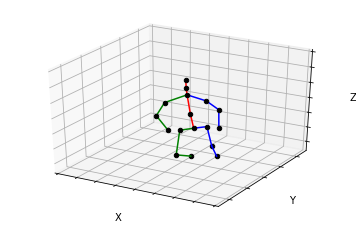

In [73]:
import matplotlib.pyplot as plt
# plot_coords = coords.T
# plot_coords = plot_coords*100
coords = skel3DArray_1[20]
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_zlabel('Z', fontsize=10)

x=0
y=2
z=1
ax.set_xlim(-.8, .8)
ax.set_ylim(-.5, .5)
ax.set_zlim(-.8, .5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_aspect('equal')
ax.invert_zaxis()
for coord in coords:
    ax.scatter3D(coord[x], coord[y], coord[z], c='0', cmap='Greens')
    
center_joints = [[0, 16], [16, 1], [1, 15], [15, 14]]
for joint in center_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'red')
    
right_joints = [[1,2], [2,3], [3,4], [14,8], [8,9], [9,10]]
for joint in right_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'green')
    
left_joints = [[1,5], [5,6], [6,7], [14,11], [11, 12], [12, 13]]
for joint in left_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'blue')
    

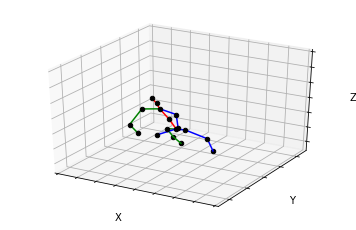

In [77]:
import matplotlib.pyplot as plt
# plot_coords = coords.T
# plot_coords = plot_coords*100
coords = skel3DArray_2[10]
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_zlabel('Z', fontsize=10)

x=0
y=2
z=1
ax.set_xlim(-.8, .8)
ax.set_ylim(-.5, .5)
ax.set_zlim(-.8, .5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_aspect('equal')
ax.invert_zaxis()
for coord in coords:
    ax.scatter3D(coord[x], coord[y], coord[z], c='0', cmap='Greens')
    
center_joints = [[0, 16], [16, 1], [1, 15], [15, 14]]
for joint in center_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'red')
    
right_joints = [[1,2], [2,3], [3,4], [14,8], [8,9], [9,10]]
for joint in right_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'green')
    
left_joints = [[1,5], [5,6], [6,7], [14,11], [11, 12], [12, 13]]
for joint in left_joints:
    ax.plot3D([coords[joint[0]][x], coords[joint[1]][x]], [coords[joint[0]][y], coords[joint[1]][y]], [coords[joint[0]][z], coords[joint[1]][z]],'blue')
    

In [11]:
import matplotlib.pyplot as plt

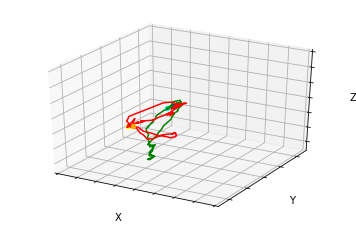

In [37]:
ax = plt.axes(projection='3d')
ax.set_xlabel('X', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_zlabel('Z', fontsize=10)
x=0
y=2
z=1
ax.set_xlim(-.8, .8)
ax.set_ylim(-.5, .5)
ax.set_zlim(-.8, .5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_aspect('equal')
ax.invert_zaxis()

xs = []
ys = []
zs = []

ind = 3

for coords in skel3DArray_1:
    xs.append(coords[ind][x])
    ys.append(coords[ind][y])
    zs.append(coords[ind][z])

ax.scatter3D(skel3DArray_1[0][ind][x], skel3DArray_1[0][ind][y], skel3DArray_1[0][ind][z], c='cyan')
ax.plot3D(xs, ys, zs, 'green')
last = len(skel3DArray_1)-1
ax.scatter3D(skel3DArray_1[last][ind][x], skel3DArray_1[last][ind][y], skel3DArray_1[last][ind][z], c='blue')

xs = []
ys = []
zs = []
for coords in skel3DArray_2:
    xs.append(coords[ind][x])
    ys.append(coords[ind][y])
    zs.append(coords[ind][z])

ax.scatter3D(skel3DArray_2[0][ind][x], skel3DArray_2[0][ind][y], skel3DArray_2[0][ind][z], c="orange")
ax.plot3D(xs, ys, zs, 'red')
last = len(skel3DArray_2)-1
ax.scatter3D(skel3DArray_2[last][ind][x], skel3DArray_2[last][ind][y], skel3DArray_2[last][ind][z], c="yellow")

In [15]:
outskel3D = cv2.VideoWriter('./outputs/'+'skel.avi', cv2.VideoWriter_fourcc(*'DIVX'), 17, (skel3DArray_1.shape[2],skel3DArray_1.shape[1]))

for i in range(skel3DArray.shape[3]):
    outskel3D.write(skel3DArray[:,:,:,i])
outskel3D.release()

array([[[ 1.21787842e-02, -7.43364453e-01, -2.77611494e-01],
        [ 2.97026671e-02, -5.12722969e-01, -1.72238693e-01],
        [-1.14050835e-01, -4.16425526e-01, -1.32913038e-01],
        ...,
        [ 3.71736661e-02,  4.11336310e-02, -4.12428379e-03],
        [ 3.84191945e-02, -1.96498305e-01, -6.57785013e-02],
        [ 2.10556537e-02, -6.27779007e-01, -2.23624647e-01]],

       [[ 2.54232436e-05, -7.44713962e-01, -3.01099956e-01],
        [ 2.07552351e-02, -5.14942408e-01, -1.83584809e-01],
        [-1.20778821e-01, -4.17297602e-01, -1.38713330e-01],
        ...,
        [ 3.14903259e-02,  2.84208860e-02, -4.82155848e-03],
        [ 2.85249241e-02, -2.03391448e-01, -7.57912695e-02],
        [ 9.79221053e-03, -6.29813731e-01, -2.37405181e-01]],

       [[-4.86270338e-03, -7.43380666e-01, -3.09133291e-01],
        [ 1.71054211e-02, -5.13542175e-01, -1.83357865e-01],
        [-1.24878541e-01, -4.14229900e-01, -1.32940382e-01],
        ...,
        [ 2.61796452e-02,  2.76687890e-02,

In [16]:
skel3DArray_1.shape

(83, 17, 3)